In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as spy
from IPython.display import display, Image
spy.init_printing()

# Filtro con amplificación

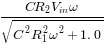

\frac{C R_{2} V_{in} \omega}{\sqrt{C^{2} R_{1}^{2} \omega^{2} + 1.0}}


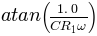

atan(1.0/(C*R_1*\omega))


In [2]:
omega, C, R_1, R_2, V_in = spy.symbols('\omega C R_1 R_2 V_{in}', real=True, positive=True)

Z_eq = 1/(1j*omega*C) + R_1
V_out = -(R_2/Z_eq)*V_in
real, imag = V_out.as_real_imag()

amplitude = spy.sqrt(real**2 + imag**2).simplify()
phase = spy.atan(imag/real)

display(amplitude)
print(spy.latex(amplitude))
display(phase)
print(phase)

CONSTANT_R_1 = 10e3
CONSTANT_R_2 = 100e3
CONSTANT_C = 0.1e-6
CONSTANT_V_in = 1

substitutions = [(R_1, CONSTANT_R_1), (R_2, CONSTANT_R_2), (C, CONSTANT_C), (V_in, CONSTANT_V_in)]

In [3]:
eq = spy.denom(amplitude)
solutions = spy.solve(eq-spy.sqrt(2), omega)[0]
display(solutions)
omega_c = float(solutions.subs(substitutions))

In [4]:
V_out = V_out.subs(substitutions).simplify()
V_c = V_out.evalf(subs = {omega:omega_c})

V_c = float(abs(V_c))

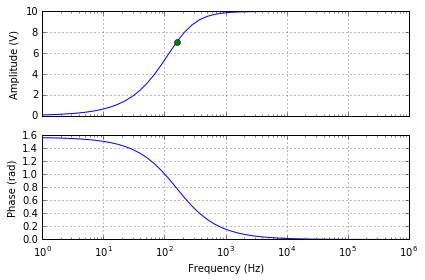

In [5]:
freq = np.logspace(0, 6)
Vouts = np.zeros_like(freq)
phases = np.zeros_like(freq)
for i,w in enumerate(freq):
    sol = V_out.evalf(subs = {omega:w*2*np.pi})
    Vouts[i] = abs(sol)
    phases[i] = spy.atan(spy.im(sol)/spy.re(sol))
    
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(freq, Vouts)
ax1.plot([omega_c/(2*np.pi)],[V_c], "o")
ax1.set_xscale('log')
ax1.set_ylabel('Amplitude (V)')
ax1.grid()
ax2.grid()
ax2.plot(freq, phases)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (rad)')
plt.tight_layout()
plt.savefig('filter.pdf')
plt.show()

# Filtro pasa banda

In [6]:
omega, C_1, C_2, R_1, R_2, R_3, R_4, R_5, V_in, V_out = spy.symbols('\omega C_1 C_2 R_1 R_2 R_3 R_4 R_5 V_{in} V_{out}',
                                                             real=True, positive=True)

Z_c1, Z_c2 = spy.symbols('Z_{c1} Z_{c2}', complex=True) 

In [7]:
V_N = V_out*R_4/(R_4+R_5)

V_1 = spy.symbols('V_1')
I_1 = (V_in-V_1)/R_1
I_2 = V_1/Z_c1
I_3 = (V_1-V_out)/R_3
I_4 = (V_1-V_N)/Z_c2

\frac{1}{R_{1}} \left(- V_{1} + V_{in}\right)


\frac{V_{1}}{Z_{c1}}


\frac{1}{R_{3}} \left(V_{1} - V_{out}\right)


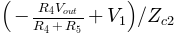

\frac{1}{Z_{c2}} \left(- \frac{R_{4} V_{out}}{R_{4} + R_{5}} + V_{1}\right)


In [8]:
currents = [I_1, I_2, I_3, I_4]
for I in currents:
    display(I)
    print(spy.latex(I))

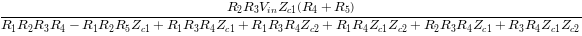

\frac{R_{2} R_{3} V_{in} Z_{c1} \left(R_{4} + R_{5}\right)}{R_{1} R_{2} R_{3} R_{4} - R_{1} R_{2} R_{5} Z_{c1} + R_{1} R_{3} R_{4} Z_{c1} + R_{1} R_{3} R_{4} Z_{c2} + R_{1} R_{4} Z_{c1} Z_{c2} + R_{2} R_{3} R_{4} Z_{c1} + R_{3} R_{4} Z_{c1} Z_{c2}}


In [9]:
V1 = V_N*(Z_c2/R_2+1)
eq = I_2+I_3+I_4-I_1
eq = eq.subs([(V_1,V1)])

sol = spy.solve(eq, V_out)[0]
display(sol)
print(spy.latex(sol))

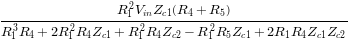

\frac{R_{1}^{2} V_{in} Z_{c1} \left(R_{4} + R_{5}\right)}{R_{1}^{3} R_{4} + 2 R_{1}^{2} R_{4} Z_{c1} + R_{1}^{2} R_{4} Z_{c2} - R_{1}^{2} R_{5} Z_{c1} + 2 R_{1} R_{4} Z_{c1} Z_{c2}}


In [10]:
substitutions = [(R_2, R_1), (R_3, R_1), (C_2, C_1)]
sol = sol.subs(substitutions)
display(sol)
print(spy.latex(sol))

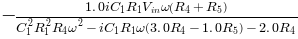

- \frac{1.0 i C_{1} R_{1} V_{in} \omega \left(R_{4} + R_{5}\right)}{C_{1}^{2} R_{1}^{2} R_{4} \omega^{2} - i C_{1} R_{1} \omega \left(3.0 R_{4} - 1.0 R_{5}\right) - 2.0 R_{4}}


In [11]:
substitutions = [(Z_c1, 1/(1j*omega*C_1)),(Z_c2, 1/(1j*omega*C_1))]
sol = sol.subs(substitutions).simplify()

display(sol)
print(spy.latex(sol))
real, imag = sol.as_real_imag()

amplitude = spy.sqrt(real**2 + imag**2).simplify()
phase = spy.atan(imag/real)

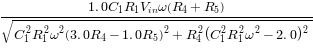

\frac{1.0 C_{1} R_{1} V_{in} \omega \left(R_{4} + R_{5}\right)}{\sqrt{C_{1}^{2} R_{1}^{2} \omega^{2} \left(3.0 R_{4} - 1.0 R_{5}\right)^{2} + R_{4}^{2} \left(C_{1}^{2} R_{1}^{2} \omega^{2} - 2.0\right)^{2}}}


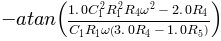

- \operatorname{atan}{\left (\frac{1.0 C_{1}^{2} R_{1}^{2} R_{4} \omega^{2} - 2.0 R_{4}}{C_{1} R_{1} \omega \left(3.0 R_{4} - 1.0 R_{5}\right)} \right )}


In [12]:
display(amplitude)
print(spy.latex(amplitude))
display(phase)
print(spy.latex(phase))

In [13]:
max_amp = spy.diff(amplitude, omega)
highest_omega = spy.solve(max_amp, omega)[0]

max_amp = sol.subs([(omega, highest_omega)]).simplify()

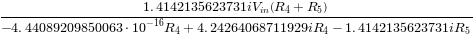

\frac{1.4142135623731 i V_{in} \left(R_{4} + R_{5}\right)}{- 4.44089209850063 \cdot 10^{-16} R_{4} + 4.24264068711929 i R_{4} - 1.4142135623731 i R_{5}}


In [14]:
display(highest_omega)

display(max_amp)
print(spy.latex(max_amp))

In [15]:
freq_corte = spy.solve(amplitude/V_in-3/spy.sqrt(2), omega)

In [16]:
CONSTANT_R_1 = 10e3
CONSTANT_R_2 = 10e3
CONSTANT_R_3 = 10e3
CONSTANT_R_4 = 1e3
CONSTANT_R_5 = 2e3

CONSTANT_C_1 = 0.1e-6
CONSTANT_C_2 = 0.1e-6
CONSTANT_V_in = 1

substitutions = [(R_1, CONSTANT_R_1), (C_1, CONSTANT_C_1), (R_4, CONSTANT_R_4), (R_5, CONSTANT_R_5), (V_in, 1)]

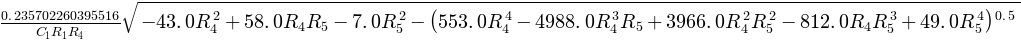

1000.00000000000
\frac{0.235702260395516}{C_{1} R_{1} R_{4}} \sqrt{- 43.0 R_{4}^{2} + 58.0 R_{4} R_{5} - 7.0 R_{5}^{2} - \left(553.0 R_{4}^{4} - 4988.0 R_{4}^{3} R_{5} + 3966.0 R_{4}^{2} R_{5}^{2} - 812.0 R_{4} R_{5}^{3} + 49.0 R_{5}^{4}\right)^{0.5}}


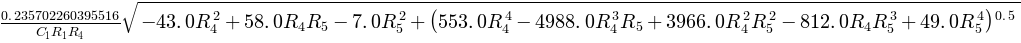

2000.00000000000
\frac{0.235702260395516}{C_{1} R_{1} R_{4}} \sqrt{- 43.0 R_{4}^{2} + 58.0 R_{4} R_{5} - 7.0 R_{5}^{2} + \left(553.0 R_{4}^{4} - 4988.0 R_{4}^{3} R_{5} + 3966.0 R_{4}^{2} R_{5}^{2} - 812.0 R_{4} R_{5}^{3} + 49.0 R_{5}^{4}\right)^{0.5}}


In [17]:
for i, item in enumerate(freq_corte):
    if i%2:
        display(item)
        temp = item.subs(substitutions)
        print(temp)
        print(spy.latex(item.simplify()))

In [18]:
freq = np.logspace(0, 6, 1000)
Vouts = np.zeros_like(freq)
evaluated = sol.subs(substitutions)
for i,w in enumerate(freq):
    temp = evaluated.evalf(subs={omega:w*2*np.pi})
    Vouts[i] = abs(temp)

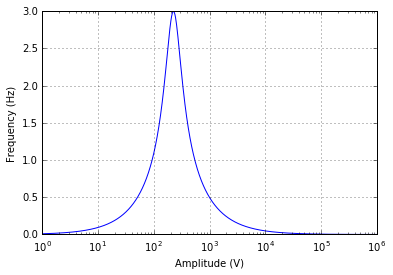

In [19]:
plt.plot(freq, Vouts)
plt.xlabel('Amplitude (V)')
plt.ylabel('Frequency (Hz)')
plt.xscale('log')
plt.grid()
plt.savefig('band-pass-plot.pdf')